In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)

Following the tutorial https://github.com/acgeospatial/Satellite_Imagery_Python/blob/master/SentinelSat_Demo.ipynb

In [2]:
import numpy as np
import geopandas as gpd
import folium
import os
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt, placename_to_wkt
import matplotlib.pyplot as plt

user = os.environ['DHUS_USER']
pwd = os.environ['DHUS_PASSWORD']

DEBUG:shapely.geos:Found GEOS DLL: <CDLL '/home/gsa/anaconda3/envs/dl/lib/python3.10/site-packages/Shapely.libs/libgeos_c-c8ec7514.so.1.16.1', handle 559081fce200 at 0x7f6e4c98da50>, using it.
DEBUG:matplotlib:matplotlib data path: /home/gsa/anaconda3/envs/dl/lib/python3.10/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/gsa/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:CACHEDIR=/home/gsa/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/gsa/.cache/matplotlib/fontlist-v330.json


In [5]:
coords = [5,46,10,48]
m = folium.Map((coords[1], coords[0]), zoom_start=10)
# boundsdata = r'D:\sentinelsat\bounds_IOW.geojson'
# folium.GeoJson(boundsdata).add_to(m)
m

In [6]:
api = SentinelAPI(user, pwd, 'https://scihub.copernicus.eu/dhus')

In [7]:
footprint = placename_to_wkt('zurich')
# otherwise requires a custome geojson file
products = api.query(area=footprint[0],
                     date = ('20220101', '20220217'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
#                      producttype='S2MSI1C',
                     cloudcoverpercentage = (0, 20))

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
DEBUG:urllib3.connectionpool:https://nominatim.openstreetmap.org:443 "GET /search?q=zurich&format=geojson HTTP/1.1" 200 None
DEBUG:sentinelsat.SentinelAPI:Running query: order_by=None, limit=None, offset=0, query=beginPosition:["2022-01-01T00:00:00Z" TO "2022-02-17T00:00:00Z"] cloudcoverpercentage:["0" TO "20"] platformname:"Sentinel-2" processinglevel:"Level-2A" footprint:"Intersects(ENVELOPE(8.4480061, 8.6254413, 47.4346662, 47.3202187))"
DEBUG:sentinelsat.SentinelAPI:Sub-query: offset=0, limit=None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scihub.copernicus.eu:443
DEBUG:urllib3.connectionpool:https://scihub.copernicus.eu:443 "GET /dhus/search?format=json&rows=100&start=0&q=beginPosition%3A%5B%222022-01-01T00%3A00%3A00Z%22+TO+%222022-02-17T00%3A00%3A00Z%22%5D+cloudcoverpercentage%3A%5B%220%22+TO+%2220%22%5D+platformname%3A%22Sentinel-2%22+processinglevel%3A%22Level-2A

In [8]:
# api.to_geodataframe(products).head()
products

OrderedDict([('06b9ca5a-c20e-4012-bd0e-60909334fe0b',
              {'title': 'S2A_MSIL2A_20220213T103131_N0400_R108_T32TMT_20220213T152822',
               'link': "https://scihub.copernicus.eu/dhus/odata/v1/Products('06b9ca5a-c20e-4012-bd0e-60909334fe0b')/$value",
               'link_alternative': "https://scihub.copernicus.eu/dhus/odata/v1/Products('06b9ca5a-c20e-4012-bd0e-60909334fe0b')/",
               'link_icon': "https://scihub.copernicus.eu/dhus/odata/v1/Products('06b9ca5a-c20e-4012-bd0e-60909334fe0b')/Products('Quicklook')/$value",
               'summary': 'Date: 2022-02-13T10:31:31.024Z, Instrument: MSI, Satellite: Sentinel-2, Size: 1.17 GB',
               'ondemand': 'false',
               'generationdate': datetime.datetime(2022, 2, 13, 15, 28, 22),
               'beginposition': datetime.datetime(2022, 2, 13, 10, 31, 31, 24000),
               'endposition': datetime.datetime(2022, 2, 13, 10, 31, 31, 24000),
               'ingestiondate': datetime.datetime(2022, 2,

Plot the table as a GeoPandas dataframe, based on the uuid field



DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/gsa/anaconda3/envs/dl/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/gsa/anaconda3/envs/dl/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/gsa/anaconda3/envs/dl/lib/python3.10/s

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/gsa/anaconda3/envs/dl/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/gsa/anaconda3/envs/dl/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/gsa/anaconda3/envs/dl/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/gsa/anaconda3/envs/dl/lib/python3.10/site-packages/matplotlib/mp

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/kacst/mry_KacstQurn.ttf', name='mry_KacstQurn', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansBuginese-Regular.ttf', name='Noto Sans Buginese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansTifinaghAzawagh-Regular.ttf', name='Noto Sans Tifinagh Azawagh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTamilSlanted-SemiCondensedExtraBold.ttf', name='Noto Serif Tamil Slanted', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansHanifiRohingya-Bold.ttf', name='Noto Sans Hanifi Rohingya', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansBuhid-Regular.ttf', name='Noto Sans Buhid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifDevanagari-Black.ttf', name='Noto Serif Devanagari', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-BI.ttf', name='Ubuntu Mono', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfon

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansHebrew-SemiCondensedSemiBold.ttf', name='Noto Sans Hebrew', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/mathjax/MathJax_Vector-Bold.otf', name='MathJax_Vector-Bold', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoRashiHebrew-ExtraBold.ttf', name='Noto Rashi Hebrew', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansTelugu-ExtraCondensedExtraLight.ttf', name='Noto Sans Telugu', style='normal', variant='normal', weight=200, stretch='condensed', size='scalable')) = 10.44
DEB

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansTelugu-Black.ttf', name='Noto Sans Telugu', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansKannada-ExtraCondensedBold.ttf', name='Noto Sans Kannada', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansTamil-SemiBold.ttf', name='Noto Sans Tamil', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansMyanmar-ExtraCondensedExtraLight.ttf', name='Noto Sans Myanmar', style='normal', variant='normal', weight=200, stretch='condensed', size='scalable')) = 10.44
DEBUG:matpl

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansThai-Thin.ttf', name='Noto Sans Thai', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifDevanagari-CondensedExtraLight.ttf', name='Noto Serif Devanagari', style='normal', variant='normal', weight=200, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTelugu-Bold.ttf', name='Noto Serif Telugu', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansVai-Regular.ttf', name='Noto Sans Vai', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findf

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansSignWriting-Regular.ttf', name='Noto Sans SignWriting', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/teluguvijayam/Gidugu.ttf', name='Gidugu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansDisplay-Regular.ttf', name='Noto Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/malayalam/Manjari-Bold.otf', name='Manjari', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/us

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifEthiopic-CondensedMedium.ttf', name='Noto Serif Ethiopic', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoLoopedLao-SemiCondensedBlack.ttf', name='Noto Looped Lao', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) = 10.725
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansMalayalam-CondensedExtraLight.ttf', name='Noto Sans Malayalam', style='normal', variant='normal', weight=200, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoLoopedThai-ExtraCondensedBold.ttf', name='Noto Looped Thai', style='normal', variant='normal', weight=700, stretch='condense

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/malayalam/AnjaliOldLipi-Regular.ttf', name='AnjaliOldLipi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/lato/Lato-LightItalic.ttf', name='Lato', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifDisplay-Regular.ttf', name='Noto Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansLao-CondensedLight.ttf', name='Noto Sans Lao', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: sco

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansMono-ExtraCondensedBlack.ttf', name='Noto Sans Mono', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) = 10.725
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerif-Condensed.ttf', name='Noto Serif', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTamilSlanted-Black.ttf', name='Noto Serif Tamil Slanted', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTamil-CondensedThin.ttf', name='Noto Serif Tamil', style='normal', variant='normal', weight=100, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.f

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoNaskhArabic-Regular.ttf', name='Noto Naskh Arabic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifDisplay-SemiCondensedLightItalic.ttf', name='Noto Serif Display', style='italic', variant='normal', weight=300, stretch='condensed', size='scalable')) = 11.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerif-CondensedMedium.ttf', name='Noto Serif', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifGeorgian-CondensedExtraLight.ttf', name='Noto Serif Georgian', style='normal', variant='normal', weight=200, stretch='condensed', s

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTamilSlanted-CondensedExtraBold.ttf', name='Noto Serif Tamil Slanted', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansHebrew-CondensedBlack.ttf', name='Noto Sans Hebrew', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) = 10.725
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Umpush-Light.ttf', name='Umpush', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifMalayalam-Black.ttf', name='Noto Serif Malayalam', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
DEBUG:m

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-deva-extra/kalimati.ttf', name='Kalimati', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansGurmukhi-SemiCondensedMedium.ttf', name='Noto Sans Gurmukhi', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansTamilUI-Bold.ttf', name='Noto Sans Tamil UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifSinhala-ExtraBold.ttf', name='Noto Serif Sinhala', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
DEBUG:matplotlib.fo

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansDevanagari-ExtraBold.ttf', name='Noto Sans Devanagari', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansArabic-CondensedMedium.ttf', name='Noto Sans Arabic', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansTelugu-Medium.ttf', name='Noto Sans Telugu', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansEthiopic-CondensedExtraBold.ttf', name='Noto Sans Ethiopic', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansTelugu-CondensedLight.ttf', name='Noto Sans Telugu', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/linux-libertine/LinLibertine_DR.otf', name='Linux Libertine Display O', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTamilSlanted-CondensedThin.ttf', name='Noto Serif Tamil Slanted', style='normal', variant='normal', weight=100, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifKhmer-SemiCondensedBlack.ttf', name='Noto Serif Khmer', style='normal', variant='normal', weight=900, stretch='condensed',

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansAvestan-Regular.ttf', name='Noto Sans Avestan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifBengali-ExtraCondensedBold.ttf', name='Noto Serif Bengali', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansSinhala-ExtraCondensedBlack.ttf', name='Noto Sans Sinhala', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) = 10.725
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansKannada-CondensedThin.ttf', name='Noto Sans Kannada', style='normal', variant='normal', weight=100, stretch='condensed', size='scalable')) = 10.5

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifEthiopic-ExtraLight.ttf', name='Noto Serif Ethiopic', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansKhmerUI-Bold.ttf', name='Noto Sans Khmer UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansSinhala-ExtraCondensed.ttf', name='Noto Sans Sinhala', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansCherokee-SemiBold.ttf', name='Noto Sans Cherokee', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansArabic-ExtraCondensedSemiBold.ttf', name='Noto Sans Arabic', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerif-BlackItalic.ttf', name='Noto Serif', style='italic', variant='normal', weight=900, stretch='normal', size='scalable')) = 11.525
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansGeorgian-SemiCondensedSemiBold.ttf', name='Noto Sans Georgian', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/kacst/KacstArt.ttf', name='KacstArt', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findf

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoNaskhArabicUI-Bold.ttf', name='Noto Naskh Arabic UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/Nakula/nakula.ttf', name='Nakula', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifMyanmar-ExtraCondensedLight.ttf', name='Noto Serif Myanmar', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansTelugu-Thin.ttf', name='Noto Sans Telugu', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfon

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTibetan-Light.ttf', name='Noto Serif Tibetan', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansArabic-CondensedLight.ttf', name='Noto Sans Arabic', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSans-SemiCondensed.ttf', name='Noto Sans', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansTamil-CondensedThin.ttf', name='Noto Sans Tamil', style='normal', variant='normal', weight=100, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.f

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansOlChiki-Bold.ttf', name='Noto Sans Ol Chiki', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansGeorgian-CondensedLight.ttf', name='Noto Sans Georgian', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansLao-ExtraCondensedBold.ttf', name='Noto Sans Lao', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifDevanagari-SemiBold.ttf', name='Noto Serif Devanagari', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24


DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoRashiHebrew-Medium.ttf', name='Noto Rashi Hebrew', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/mathjax/MathJax_Typewriter-Regular.otf', name='MathJax_Typewriter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuMathTeXGyre.ttf', name='DejaVu Math TeX Gyre', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/URWGothic-Book.otf', name='URW Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: scor

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansHanunoo-Regular.ttf', name='Noto Sans Hanunoo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansYi-Regular.ttf', name='Noto Sans Yi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansDisplay-ExtraBold.ttf', name='Noto Sans Display', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifDisplay-ExtraBoldItalic.ttf', name='Noto Serif Display', style='italic', variant='normal', weight=800, stretch='normal', size='scalable')) = 11.43
DEBUG:matplotlib.font_manager:findfont

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansSinhala-Medium.ttf', name='Noto Sans Sinhala', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ttf-khmeros-core/KhmerOSsys.ttf', name='Khmer OS System', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/C059-Roman.otf', name='C059', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTamilSlanted-Condensed.ttf', name='Noto Serif Tamil Slanted', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerif-ExtraBold.ttf', name='Noto Serif', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifGeorgian-Thin.ttf', name='Noto Serif Georgian', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansHebrew-CondensedSemiBold.ttf', name='Noto Sans Hebrew', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc', name='Noto Sans CJK JP', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansKhmer-ExtraCondensedExtraLight.ttf', name='Noto Sans Khmer', style='normal', variant='normal', weight=200, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansKhmer-Regular.ttf', name='Noto Sans Khmer', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansOriya-ExtraCondensedBold.ttf', name='Noto Sans Oriya', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-yrsa-rasa/Rasa-Light.ttf', name='Rasa', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:f

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoLoopedLao-ExtraCondensedLight.ttf', name='Noto Looped Lao', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifThai-ExtraCondensed.ttf', name='Noto Serif Thai', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansGujarati-SemiCondensedMedium.ttf', name='Noto Sans Gujarati', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansDisplay-ExtraCondensedBlack.ttf', name='Noto Sans Display', style='normal', variant='normal', weight=900, stretch='con

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifThai-SemiCondensedThin.ttf', name='Noto Serif Thai', style='normal', variant='normal', weight=100, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansDevanagari-ExtraLight.ttf', name='Noto Sans Devanagari', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSans-Italic.ttf', name='Noto Sans', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/abyssinica/AbyssinicaSIL-Regular.ttf', name='Abyssinica SIL', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfo

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifDevanagari-Condensed.ttf', name='Noto Serif Devanagari', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansLao-Condensed.ttf', name='Noto Sans Lao', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansDisplay-SemiBold.ttf', name='Noto Sans Display', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfon

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/URWGothic-DemiOblique.otf', name='URW Gothic', style='oblique', variant='normal', weight=600, stretch='normal', size='scalable')) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoLoopedLao-SemiCondensedBold.ttf', name='Noto Looped Lao', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansOriyaUI-Regular.ttf', name='Noto Sans Oriya UI', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifLao-SemiCondensedThin.ttf', name='Noto Serif Lao', style='normal', variant='normal', weight=100, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_m

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansThai-SemiCondensedLight.ttf', name='Noto Sans Thai', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoRashiHebrew-Thin.ttf', name='Noto Rashi Hebrew', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/teluguvijayam/Mandali-Regular.ttf', name='Mandali', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansHebrew-ExtraLight.ttf', name='Noto Sans Hebrew', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansLinearB-Regular.ttf', name='Noto Sans Linear B', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifDisplay-ExtraCondensedItalic.ttf', name='Noto Serif Display', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', name='Liberation Sans', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifDisplay-SemiCondensedMediumItalic.ttf', name='Noto Serif Display', style='italic', variant='normal', weight=500, stretch='condensed', size='scalable'))

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansShavian-Regular.ttf', name='Noto Sans Shavian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifThai-SemiCondensedBold.ttf', name='Noto Serif Thai', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifBengali-Condensed.ttf', name='Noto Serif Bengali', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoLoopedThai-SemiCondensedExtraLight.ttf', name='Noto Looped Thai', style='normal', variant='normal', weight=200, stretch='condensed', size='scalable')) = 10.44
DEBUG:

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', name='Liberation Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusMonoPS-Regular.otf', name='Nimbus Mono PS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation2/LiberationSans-BoldItalic.ttf', name='Liberation Sans', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansArmenian-SemiCondensedMedium.ttf', name='Noto Sans Armenian', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.34499999999999

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansGujarati-ExtraCondensed.ttf', name='Noto Sans Gujarati', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSans-SemiBoldItalic.ttf', name='Noto Sans', style='italic', variant='normal', weight=600, stretch='normal', size='scalable')) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansKayahLi-SemiBold.ttf', name='Noto Sans Kayah Li', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifThai-CondensedThin.ttf', name='Noto Serif Thai', style='normal', variant='normal', weight=100, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manage

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifThai-ExtraCondensedSemiBold.ttf', name='Noto Serif Thai', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansThai-CondensedSemiBold.ttf', name='Noto Sans Thai', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifDevanagari-ExtraCondensedBold.ttf', name='Noto Serif Devanagari', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTamilSlanted-SemiCondensedLight.ttf', name='Noto Serif Tamil Slanted', style='normal', variant='normal', weight=300, stretch='condens

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/padauk/PadaukBook-Bold.ttf', name='Padauk Book', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTamil-SemiCondensedLight.ttf', name='Noto Serif Tamil', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTamilSlanted-Medium.ttf', name='Noto Serif Tamil Slanted', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifLao-SemiCondensedLight.ttf', name='Noto Serif Lao', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansHebrew-ExtraCondensedMedium.ttf', name='Noto Sans Hebrew', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifHebrew-CondensedBlack.ttf', name='Noto Serif Hebrew', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) = 10.725
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSans-ExtraBoldItalic.ttf', name='Noto Sans', style='italic', variant='normal', weight=800, stretch='normal', size='scalable

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifMyanmar-ExtraCondensed.ttf', name='Noto Serif Myanmar', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifHebrew-ExtraLight.ttf', name='Noto Serif Hebrew', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/kacst/KacstOffice.ttf', name='KacstOffice', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansKhmer-SemiCondensed.ttf', name='Noto Sans Khmer', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfo

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansKaithi-Regular.ttf', name='Noto Sans Kaithi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansSymbols-Black.ttf', name='Noto Sans Symbols', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansMyanmar-CondensedMedium.ttf', name='Noto Sans Myanmar', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansCanadianAboriginal-Medium.ttf', name='Noto Sans Canadian Aboriginal', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansMono-ExtraCondensedExtraLight.ttf', name='Noto Sans Mono', style='normal', variant='normal', weight=200, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTamil-Bold.ttf', name='Noto Serif Tamil', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifKhmer-ExtraCondensedBold.ttf', name='Noto Serif Khmer', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansMalayalam-CondensedLight.ttf', name='Noto Sans Malayalam', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifGeorgian-Regular.ttf', name='Noto Serif Georgian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansGujarati-ExtraCondensedLight.ttf', name='Noto Sans Gujarati', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/malayalam/Keraleeyam-Regular.ttf', name='Keraleeyam', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:f

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSans-ExtraCondensedMedium.ttf', name='Noto Sans', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansWancho-Regular.ttf', name='Noto Sans Wancho', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansMeroitic-Regular.ttf', name='Noto Sans Meroitic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifHebrew-ExtraCondensedThin.ttf', name='Noto Serif Hebrew', style='normal', variant='normal', weight=100, stretch='condensed', size='scalable')) = 10.535
DEBUG:matpl

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTamilSlanted-Thin.ttf', name='Noto Serif Tamil Slanted', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTamil-SemiCondensedBlack.ttf', name='Noto Serif Tamil', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) = 10.725
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoLoopedLao-Light.ttf', name='Noto Looped Lao', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.f

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansArmenian-SemiCondensedThin.ttf', name='Noto Sans Armenian', style='normal', variant='normal', weight=100, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTamilSlanted-CondensedLight.ttf', name='Noto Serif Tamil Slanted', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansLao-SemiCondensedExtraBold.ttf', name='Noto Sans Lao', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Kinnari-BoldOblique.ttf', name='Kinnari', style='oblique', variant='normal', weight=700, stretch='normal', size

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerif-CondensedSemiBoldItalic.ttf', name='Noto Serif', style='italic', variant='normal', weight=600, stretch='condensed', size='scalable')) = 11.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansMeeteiMayek-SemiBold.ttf', name='Noto Sans Meetei Mayek', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifArmenian-CondensedBlack.ttf', name='Noto Serif Armenian', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) = 10.725
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansKhmer-Medium.ttf', name='Noto Sans Khmer', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplot

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifLao-ExtraCondensedExtraLight.ttf', name='Noto Serif Lao', style='normal', variant='normal', weight=200, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansMalayalam-SemiCondensedExtraLight.ttf', name='Noto Sans Malayalam', style='normal', variant='normal', weight=200, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansGurmukhi-Thin.ttf', name='Noto Sans Gurmukhi', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansKhmer-SemiCondensedBlack.ttf', name='Noto Sans Khmer', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) =

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifEthiopic-SemiCondensedExtraLight.ttf', name='Noto Serif Ethiopic', style='normal', variant='normal', weight=200, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansGurmukhi-ExtraCondensedBold.ttf', name='Noto Sans Gurmukhi', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansMalayalam-ExtraCondensedExtraBold.ttf', name='Noto Sans Malayalam', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifBengali-SemiCondensed.ttf', name='Noto Serif Bengali', style='normal', variant='normal', weight=400, 

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTamil-SemiCondensedExtraLight.ttf', name='Noto Serif Tamil', style='normal', variant='normal', weight=200, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansMono-Black.ttf', name='Noto Sans Mono', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/lyx/msam10.ttf', name='msam10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fn

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSans-ExtraCondensedExtraBoldItalic.ttf', name='Noto Sans', style='italic', variant='normal', weight=800, stretch='condensed', size='scalable')) = 11.629999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoLoopedLaoUI-Bold.ttf', name='Noto Looped Lao UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansDisplay-ExtraCondensedExtraBold.ttf', name='Noto Sans Display', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansMono-CondensedExtraLight.ttf', name='Noto Sans Mono', style='normal', variant='normal', weight=200, stretch='condensed', siz

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/lato/Lato-Light.ttf', name='Lato', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansDisplay-CondensedItalic.ttf', name='Noto Sans Display', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansGurmukhi-ExtraCondensedMedium.ttf', name='Noto Sans Gurmukhi', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansTifinagh-Regular.ttf', name='Noto Sans Tifinagh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifKhmer-SemiCondensedSemiBold.ttf', name='Noto Serif Khmer', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifKannada-Medium.ttf', name='Noto Serif Kannada', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/Navilu/Navilu.ttf', name='Navilu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansMeeteiMayek-Regular.ttf', name='Noto Sans Meetei Mayek', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: 

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansOldItalic-Regular.ttf', name='Noto Sans Old Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Laksaman-BoldItalic.ttf', name='Laksaman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansDisplay-ExtraLightItalic.ttf', name='Noto Sans Display', style='italic', variant='normal', weight=200, stretch='normal', size='scalable')) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansMono-CondensedThin.ttf', name='Noto Sans Mono', style='normal', variant='normal', weight=100, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:find

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTibetan-SemiBold.ttf', name='Noto Serif Tibetan', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansArabic-Black.ttf', name='Noto Sans Arabic', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifDisplay-ExtraCondensedExtraBoldItalic.ttf', name='Noto Serif Display', style='italic', variant='normal', weight=800, stretch='condensed', size='scalable')) = 11.629999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansLao-SemiCondensedBlack.ttf', name='Noto Sans Lao', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) = 

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansLao-Thin.ttf', name='Noto Sans Lao', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifMyanmar-CondensedExtraLight.ttf', name='Noto Serif Myanmar', style='normal', variant='normal', weight=200, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerif-SemiCondensedExtraLightItalic.ttf', name='Noto Serif', style='italic', variant='normal', weight=200, stretch='condensed', size='scalable')) = 11.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/mathjax/MathJax_SansSerif-Italic.otf', name='MathJax_SansSerif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoLoopedThai-SemiCondensedBlack.ttf', name='Noto Looped Thai', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) = 10.725
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerif-SemiCondensedMedium.ttf', name='Noto Serif', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansDevanagari-CondensedExtraLight.ttf', name='Noto Sans Devanagari', style='normal', variant='normal', weight=200, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansGurmukhi-SemiCondensedThin.ttf', name='Noto Sans Gurmukhi', style='normal', variant='normal', weight=100, stretch='condensed', si

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansGunjalaGondi-Regular.ttf', name='Noto Sans Gunjala Gondi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifKhmer-Bold.ttf', name='Noto Serif Khmer', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf', name='Nimbus Roman', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifThai-Black.ttf', name='Noto Serif Thai', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
DEBUG:matplotlib.font_manager:findfont: sc

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/mathjax/MathJax_Fraktur-Regular.otf', name='MathJax_Fraktur', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoRashiHebrew-Light.ttf', name='Noto Rashi Hebrew', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansTelugu-ExtraCondensedSemiBold.ttf', name='Noto Sans Telugu', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansMeeteiMayek-Bold.ttf', name='Noto Sans Meetei Mayek', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansGeorgian-SemiCondensedMedium.ttf', name='Noto Sans Georgian', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansGurmukhi-SemiCondensedExtraLight.ttf', name='Noto Sans Gurmukhi', style='normal', variant='normal', weight=200, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/Sahadeva/sahadeva.ttf', name='Sahadeva', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifLao-CondensedBold.ttf', name='Noto Serif Lao', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansEthiopic-ExtraCondensedThin.ttf', name='Noto Sans Ethiopic', style='normal', variant='normal', weight=100, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansArmenian-CondensedExtraBold.ttf', name='Noto Sans Armenian', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoRashiHebrew-ExtraLight.ttf', name='Noto Rashi Hebrew', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerif-ExtraCondensedItalic.ttf', name='Noto Serif', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansNKo-Regular.ttf', name='Noto Sans NKo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansTifinaghSIL-Regular.ttf', name='Noto Sans Tifinagh SIL', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/freefont/FreeSansOblique.ttf', name='FreeSans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifBengali-CondensedSemiBold.ttf', name='Noto Serif Bengali', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfo

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Norasi-Oblique.ttf', name='Norasi', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifDisplay-ExtraLight.ttf', name='Noto Serif Display', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTamil-SemiCondensedThin.ttf', name='Noto Serif Tamil', style='normal', variant='normal', weight=100, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoLoopedLao-CondensedExtraBold.ttf', name='Noto Looped Lao', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999
DEBUG:matplotlib.fo

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tibetan-machine/TibetanMachineUni.ttf', name='Tibetan Machine Uni', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansDisplay-CondensedMediumItalic.ttf', name='Noto Sans Display', style='italic', variant='normal', weight=500, stretch='condensed', size='scalable')) = 11.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansHebrew-SemiCondensedExtraBold.ttf', name='Noto Sans Hebrew', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifBengali-ExtraCondensedExtraLight.ttf', name='Noto Serif Bengali', style='normal', variant='normal', weight=200,

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansGurmukhi-CondensedLight.ttf', name='Noto Sans Gurmukhi', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifBengali-SemiCondensedBlack.ttf', name='Noto Serif Bengali', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) = 10.725
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/TlwgTypist-BoldOblique.ttf', name='Tlwg Typist', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansSinhala-SemiCondensedLight.ttf', name='Noto Sans Sinhala', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable'

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansSinhala-ExtraBold.ttf', name='Noto Sans Sinhala', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansDevanagari-ExtraCondensedExtraLight.ttf', name='Noto Sans Devanagari', style='normal', variant='normal', weight=200, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifDevanagari-SemiCondensedExtraBold.ttf', name='Noto Serif Devanagari', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansArabic-ExtraCondensedMedium.ttf', name='Noto Sans Arabic', style='normal', variant='normal', weight=500, stretc

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/porson/GFSPorson.otf', name='GFS Porson', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansTifinaghHawad-Regular.ttf', name='Noto Sans Tifinagh Hawad', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansThai-Light.ttf', name='Noto Sans Thai', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifNyiakengPuachueHmong-Regular.ttf', name='Noto Serif Hmong Nyiakeng', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:f

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansDisplay-SemiCondensedSemiBoldItalic.ttf', name='Noto Sans Display', style='italic', variant='normal', weight=600, stretch='condensed', size='scalable')) = 11.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansKannada-SemiCondensedExtraBold.ttf', name='Noto Sans Kannada', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansGujarati-SemiCondensed.ttf', name='Noto Sans Gujarati', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifHebrew-CondensedBold.ttf', name='Noto Serif Hebrew', style='normal', variant='normal', weight=700, stretch='cond

<AxesSubplot: >

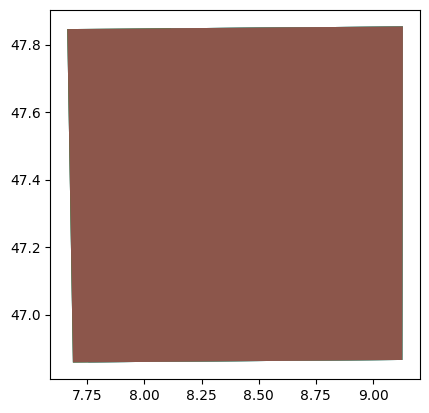

In [9]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)

In [202]:
products

OrderedDict([('06b9ca5a-c20e-4012-bd0e-60909334fe0b',
              {'title': 'S2A_MSIL2A_20220213T103131_N0400_R108_T32TMT_20220213T152822',
               'link': "https://scihub.copernicus.eu/dhus/odata/v1/Products('06b9ca5a-c20e-4012-bd0e-60909334fe0b')/$value",
               'link_alternative': "https://scihub.copernicus.eu/dhus/odata/v1/Products('06b9ca5a-c20e-4012-bd0e-60909334fe0b')/",
               'link_icon': "https://scihub.copernicus.eu/dhus/odata/v1/Products('06b9ca5a-c20e-4012-bd0e-60909334fe0b')/Products('Quicklook')/$value",
               'summary': 'Date: 2022-02-13T10:31:31.024Z, Instrument: MSI, Satellite: Sentinel-2, Size: 1.17 GB',
               'ondemand': 'false',
               'generationdate': datetime.datetime(2022, 2, 13, 15, 28, 22),
               'beginposition': datetime.datetime(2022, 2, 13, 10, 31, 31, 24000),
               'endposition': datetime.datetime(2022, 2, 13, 10, 31, 31, 24000),
               'ingestiondate': datetime.datetime(2022, 2,

In [203]:
# inspect product and get full metadata on the server
api.get_product_odata('06b9ca5a-c20e-4012-bd0e-60909334fe0b', full=True)

DEBUG:urllib3.connectionpool:Resetting dropped connection: scihub.copernicus.eu
DEBUG:urllib3.connectionpool:https://scihub.copernicus.eu:443 "GET /dhus/odata/v1/Products('06b9ca5a-c20e-4012-bd0e-60909334fe0b')?$format=json&$expand=Attributes HTTP/1.1" 200 None


{'id': '06b9ca5a-c20e-4012-bd0e-60909334fe0b',
 'title': 'S2A_MSIL2A_20220213T103131_N0400_R108_T32TMT_20220213T152822',
 'size': 1258476970,
 'md5': '4e195afb9ab840aedbe50010d1e9d3a7',
 'date': datetime.datetime(2022, 2, 13, 10, 31, 31, 24000),
 'footprint': 'POLYGON((7.662865290445674 47.84591482730969,9.130470361916801 47.85362771191058,9.128057161151142 46.86562824777826,7.687588500476012 46.858175957972115,7.662865290445674 47.84591482730969))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('06b9ca5a-c20e-4012-bd0e-60909334fe0b')/$value",
 'Online': False,
 'Creation Date': datetime.datetime(2022, 2, 13, 19, 23, 0, 863000),
 'Ingestion Date': datetime.datetime(2022, 2, 13, 19, 22, 33, 402000),
 'Aot retrieval accuracy': 0.0,
 'Cloud cover percentage': 2.369404,
 'Cloud shadow percentage': 0.022551,
 'Dark features percentage': 5.274169,
 'Date': datetime.datetime(2022, 2, 13, 10, 31, 31, 24000),
 'Degraded ancillary data percentage': 0.0,
 'Degraded MSI data percent

To save as geojson:
- Search based on location
- Then call `api.to_geojson(products)` and then save

In [198]:
# api.to_geojson(products)

06b9ca5a-c20e-4012-bd0e-60909334fe0b    Annotation(8.40224, 47.3574, '06b9ca5a-c20e-40...
aef826ff-885c-4a23-bfcb-e08037746667    Annotation(8.5257, 47.332, 'aef826ff-885c-4a23...
33f15eba-ea2b-44e7-a630-326b7d276916    Annotation(8.40224, 47.3574, '33f15eba-ea2b-44...
5bf31baf-9c55-4544-82d3-993e63a070a4    Annotation(8.52772, 47.332, '5bf31baf-9c55-454...
56d30e83-217f-40c3-b195-df67fc0630c5    Annotation(8.40224, 47.3574, '56d30e83-217f-40...
dtype: object

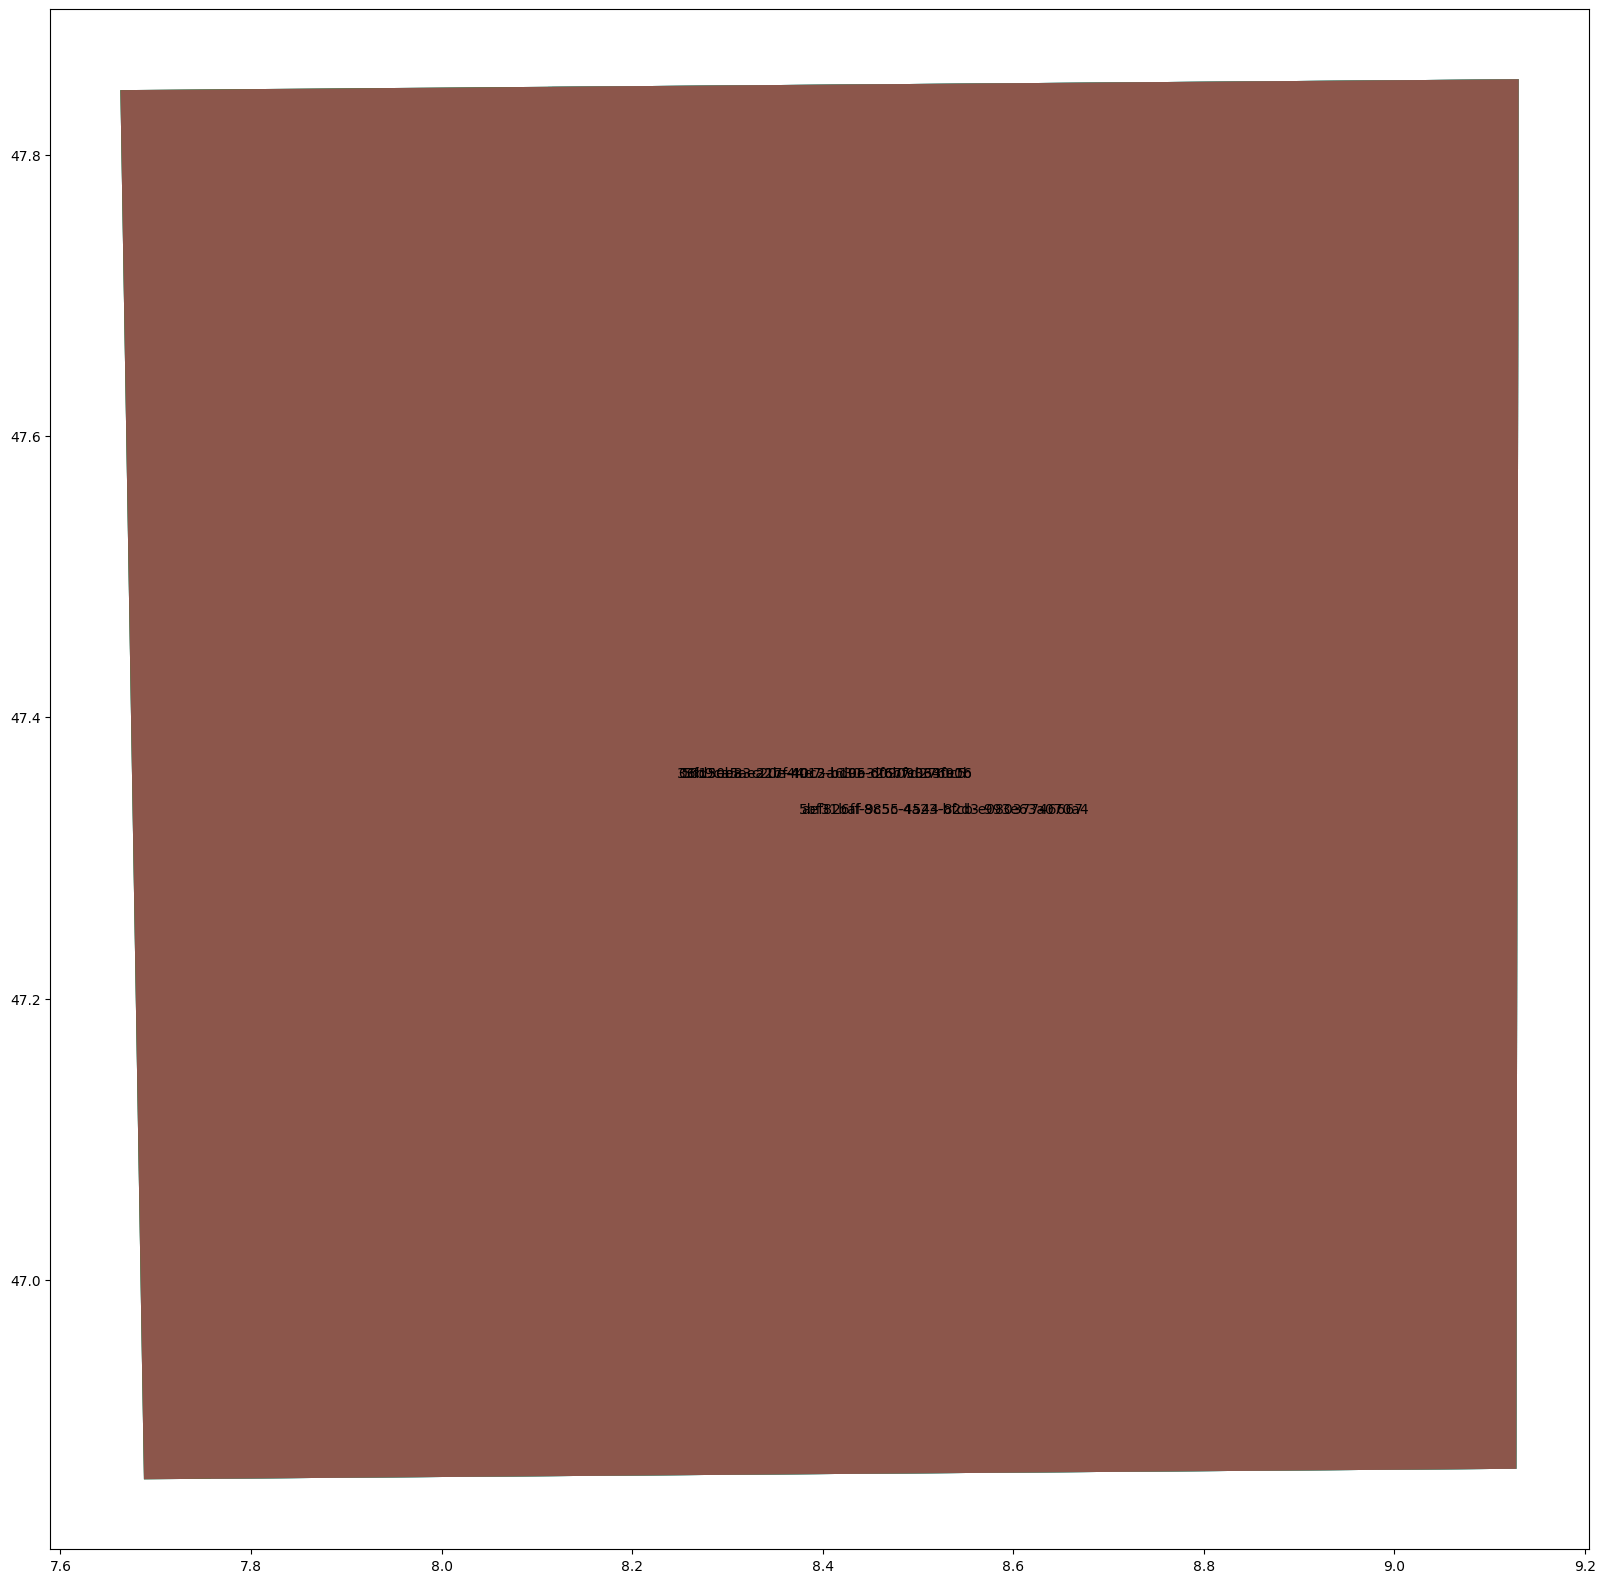

In [10]:
# label the polygons
ax = areas.plot(column='uuid', cmap=None, figsize=(20, 20))
areas.apply(lambda x: ax.annotate(text=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [11]:
areas.columns
# areas.loc['18a2081e-fb06-4ee9-874a-cc687d60aa3e']
areas['uuid']

06b9ca5a-c20e-4012-bd0e-60909334fe0b    06b9ca5a-c20e-4012-bd0e-60909334fe0b
aef826ff-885c-4a23-bfcb-e08037746667    aef826ff-885c-4a23-bfcb-e08037746667
33f15eba-ea2b-44e7-a630-326b7d276916    33f15eba-ea2b-44e7-a630-326b7d276916
5bf31baf-9c55-4544-82d3-993e63a070a4    5bf31baf-9c55-4544-82d3-993e63a070a4
56d30e83-217f-40c3-b195-df67fc0630c5    56d30e83-217f-40c3-b195-df67fc0630c5
Name: uuid, dtype: object

## Download

In [21]:
from pathlib import Path
from sentinelsat.products import make_path_filter

out_path = Path('../sentinel').resolve()
download_tile = '6f96421c-077e-4909-94a7-41d6ab355b9c'
download_tile = '7de59f24-40e8-41f2-9ca2-b69d0b0c8178'
download_tile = ('315120bb-0720-4c02-8146-7abb38453ba0')
# download_tile = '06b9ca5a-c20e-4012-bd0e-60909334fe0b'
# random place in south england
download_tile = ('30b9e88b-94a7-45ec-9ceb-4fa8bf86be04')
return_dict = api.download(download_tile, 
                           directory_path=out_path,
#                           the following only downloads images
#                            nodefilter=make_path_filter('*.jp2')
                          )


DEBUG:urllib3.connectionpool:Resetting dropped connection: scihub.copernicus.eu
DEBUG:urllib3.connectionpool:https://scihub.copernicus.eu:443 "GET /dhus/odata/v1/Products('30b9e88b-94a7-45ec-9ceb-4fa8bf86be04')?$format=json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://scihub.copernicus.eu:443 "HEAD /dhus/odata/v1/Products('30b9e88b-94a7-45ec-9ceb-4fa8bf86be04')/$value HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:https://scihub.copernicus.eu:443 "GET /dhus/odata/v1/Products('30b9e88b-94a7-45ec-9ceb-4fa8bf86be04')/Online/$value HTTP/1.1" 200 4
INFO:sentinelsat.SentinelAPI:Download will resume from existing incomplete file /home/gsa/code/dl/data/sentinel/S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_20190226T172349.zip.incomplete.
DEBUG:urllib3.connectionpool:https://scihub.copernicus.eu:443 "GET /dhus/odata/v1/Products('30b9e88b-94a7-45ec-9ceb-4fa8bf86be04')/$value HTTP/1.1" 206 1018668839


MD5 checksumming:   0%|          | 0.00/1.07G [00:00<?, ?B/s]

In [22]:
return_dict

{'id': '30b9e88b-94a7-45ec-9ceb-4fa8bf86be04',
 'title': 'S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_20190226T172349',
 'size': 1073194791,
 'md5': 'bedf8f60b10a030b54ef6710642a46c2',
 'date': datetime.datetime(2019, 2, 26, 11, 10, 49, 24000),
 'footprint': 'POLYGON((-1.5611267 51.44235231685392,0.017025008525814 51.41234265506691,-0.046142578 50.42629366061962,-1.5912781 50.45527216066188,-1.5611267 51.44235231685392))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('30b9e88b-94a7-45ec-9ceb-4fa8bf86be04')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 2, 27, 1, 51, 37, 142000),
 'Ingestion Date': datetime.datetime(2019, 2, 27, 0, 35, 3, 682000),
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('30b9e88b-94a7-45ec-9ceb-4fa8bf86be04')/Products('Quicklook')/$value",
 'path': '/home/gsa/code/dl/data/sentinel/S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_20190226T172349.zip',
 'downloaded_bytes': 1018668839}

In [15]:
import zipfile # https://stackoverflow.com/questions/3451111/unzipping-files-in-python

zip_ref = zipfile.ZipFile(return_dict['path'], 'r')
zip_ref.extractall(out_path)
zip_ref.close()

KeyError: 'path'

In [20]:
return_dict['nodes'].keys()

dict_keys(['./manifest.safe', './GRANULE/L2A_T30UXB_A010316_20190226T111048/IMG_DATA/R10m/T30UXB_20190226T111049_AOT_10m.jp2', './GRANULE/L2A_T30UXB_A010316_20190226T111048/IMG_DATA/R10m/T30UXB_20190226T111049_B02_10m.jp2', './GRANULE/L2A_T30UXB_A010316_20190226T111048/IMG_DATA/R10m/T30UXB_20190226T111049_B03_10m.jp2', './GRANULE/L2A_T30UXB_A010316_20190226T111048/IMG_DATA/R10m/T30UXB_20190226T111049_B04_10m.jp2', './GRANULE/L2A_T30UXB_A010316_20190226T111048/IMG_DATA/R10m/T30UXB_20190226T111049_B08_10m.jp2', './GRANULE/L2A_T30UXB_A010316_20190226T111048/IMG_DATA/R10m/T30UXB_20190226T111049_TCI_10m.jp2', './GRANULE/L2A_T30UXB_A010316_20190226T111048/IMG_DATA/R10m/T30UXB_20190226T111049_WVP_10m.jp2', './GRANULE/L2A_T30UXB_A010316_20190226T111048/IMG_DATA/R20m/T30UXB_20190226T111049_AOT_20m.jp2', './GRANULE/L2A_T30UXB_A010316_20190226T111048/IMG_DATA/R20m/T30UXB_20190226T111049_B02_20m.jp2', './GRANULE/L2A_T30UXB_A010316_20190226T111048/IMG_DATA/R20m/T30UXB_20190226T111049_B03_20m.jp2', 